In [1]:
pip install -q streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.7 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import streamlit as st
import warnings

In [3]:
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
plt.style.use('ggplot')
%matplotlib inline

In [4]:
# Load dataset
df = pd.read_csv('/content/data.csv')

In [ ]:
df.head(10)

,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,...,Desired_Savings,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous
0,44637.24964,49,0,Self_Employed,Tier_1,13391.174890,0.000000,2206.490129,6658.768341,2636.970696,...,6200.537192,11265.627710,1685.696222,328.895281,465.769172,195.151320,678.292859,67.682471,0.000000,85.735517
1,26858.59659,34,2,Retired,Tier_2,5371.719318,0.000000,869.522617,2818.444460,1543.018778,...,1923.176434,9676.818733,540.306561,119.347139,141.866089,234.131168,286.668408,6.603212,56.306874,97.388606
2,50367.60508,35,1,Student,Tier_3,7555.140763,4612.103386,2201.800050,6313.222081,3221.396403,...,7050.360422,13891.450620,1466.073984,473.549752,410.857129,459.965257,488.383423,7.290892,106.653597,138.542422
3,101455.60020,21,0,Self_Employed,Tier_3,15218.340040,6809.441427,4889.418087,14690.149360,7106.130005,...,16694.965140,31617.953610,1875.932770,762.020789,1241.017448,320.190594,1389.815033,193.502754,0.000000,296.041183
4,24875.28355,52,4,Professional,Tier_2,4975.056710,3112.609398,635.907170,3034.329665,1276.155163,...,1874.099434,6265.700532,788.953124,68.160766,61.712505,187.173750,194.117130,47.294591,67.388120,96.557076
5,24875.61027,57,4,Self_Employed,Tier_2,4975.122053,0.000000,1038.230996,3250.067756,1760.164812,...,1478.666359,7599.265300,957.619116,521.683848,135.925865,148.952326,86.567256,13.143683,33.961843,96.675925
6,106119.69280,53,0,Self_Employed,Tier_2,21223.938550,0.000000,4360.202710,12790.390690,6345.738036,...,18399.564590,41595.325720,2799.234658,912.958599,438.009790,541.702363,838.299989,111.857588,0.000000,409.453143
7,55431.34151,40,1,Professional,Tier_2,11086.268300,8307.702220,1755.439820,8194.482410,3353.001888,...,6636.413893,8465.944597,1059.499640,838.163700,466.179258,327.902059,353.411650,92.739538,116.121726,71.520963
8,20606.73312,32,4,Retired,Tier_1,6182.019936,3562.488826,1018.589940,3066.867220,1170.790666,...,362.917872,362.917872,822.974023,212.998059,85.489142,97.812946,252.344383,9.984250,59.957848,80.754353
9,46304.79023,30,1,Student,Tier_2,9260.958047,0.000000,2130.254825,5065.627032,2500.054847,...,5615.104745,15690.256280,962.019888,380.272262,598.882904,188.311642,793.644470,34.873044,39.738841,203.146675


In [ ]:
df.describe()

,Income,Age,Dependents,Rent,Loan_Repayment,Insurance,Groceries,Transport,Eating_Out,Entertainment,...,Desired_Savings,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous
count,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,4.158550e+04,41.031450,1.995950,9115.494629,2049.800292,1455.028761,5205.667493,2704.466685,1461.856982,1448.853658,...,4982.878416,10647.367257,912.197183,473.042650,254.963280,254.031058,436.332808,41.524964,62.417083,144.904987
std,4.001454e+04,13.578725,1.417616,9254.228188,4281.789941,1492.938435,5035.953689,2666.345648,1481.660811,1489.019270,...,7733.468188,11740.637289,1038.884968,537.222853,296.047943,299.973590,503.200658,53.152458,98.842656,169.160951
min,1.301187e+03,18.000000,0.000000,235.365692,0.000000,30.002012,154.078240,81.228584,39.437523,45.421469,...,0.000000,-5400.788673,16.575501,8.268076,3.797926,3.121610,6.200297,0.001238,0.000000,2.091973
25%,1.760488e+04,29.000000,1.000000,3649.422245,0.000000,580.204749,2165.426419,1124.578013,581.011801,581.632906,...,1224.932636,3774.894323,317.811000,161.913751,84.506870,84.562090,148.013618,11.037421,4.926210,47.637307
50%,3.018538e+04,41.000000,2.000000,6402.751824,0.000000,1017.124681,3741.091534,1933.845509,1029.109727,1020.198375,...,2155.356763,7224.890977,607.038735,307.045856,164.927660,164.740232,285.739582,25.202124,33.127987,93.090257
75%,5.176545e+04,53.000000,3.000000,11263.940490,2627.142320,1787.160895,6470.892718,3360.597508,1807.075251,1790.104081,...,6216.309609,13331.950715,1128.681837,588.419602,313.398240,310.927935,538.983703,52.353736,80.946145,178.257981
max,1.079728e+06,64.000000,4.000000,215945.674700,123080.682000,38734.932930,119816.898100,81861.503460,34406.100170,38667.368310,...,245504.485200,377060.218500,34894.644400,12273.258240,5573.036433,6222.200913,8081.799518,1394.531049,3647.244243,4637.951137


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Income                           20000 non-null  float64
 1   Age                              20000 non-null  int64  
 2   Dependents                       20000 non-null  int64  
 3   Occupation                       20000 non-null  object 
 4   City_Tier                        20000 non-null  object 
 5   Rent                             20000 non-null  float64
 6   Loan_Repayment                   20000 non-null  float64
 7   Insurance                        20000 non-null  float64
 8   Groceries                        20000 non-null  float64
 9   Transport                        20000 non-null  float64
 10  Eating_Out                       20000 non-null  float64
 11  Entertainment                    20000 non-null  float64
 12  Utilities         

## 1.Data Cleaning and Preprocessing

In [ ]:
df.isnull().sum()

,0
Income,0
Age,0
Dependents,0
Occupation,0
City_Tier,0
Rent,0
Loan_Repayment,0
Insurance,0
Groceries,0
Transport,0


(i)Verify data consistency among income and spending columns  

In [5]:
spending_columns = ['Rent','Loan_Repayment', 'Insurance', 'Groceries', 'Transport','Eating_Out', 'Entertainment','Utilities','Healthcare','Education','Miscellaneous']

df['Total_spend'] = df[spending_columns].sum(axis=1)
df['Total_spend']

,Total_spend
0,33371.621927
1,17181.777859
2,36476.154459
3,69837.646633
4,18609.583017
...,...
19995,39750.147864
19996,59570.597471
19997,38336.662239
19998,107554.132431


In [6]:
for col in spending_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

ii) Normalize/Scale Continuous Features  

In [7]:
continuous_features = ['Income', 'Rent','Loan_Repayment', 'Insurance', 'Groceries', 'Transport','Eating_Out', 'Entertainment','Utilities','Healthcare','Education','Miscellaneous']
scaler = StandardScaler()
df[continuous_features] = scaler.fit_transform(df[continuous_features])

iii) Encode Categorical Variables  

In [8]:
label_encoder = LabelEncoder()
df['Occupation'] = label_encoder.fit_transform(df['Occupation'])
df['City_Tier'] = label_encoder.fit_transform(df['City_Tier'])

In [ ]:
df.head()

,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,...,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous,Total_spend,Expected
0,0.076268,49,0,2,0,0.462036,-0.478737,0.503356,0.288553,-0.025315,...,1685.696222,328.895281,465.769172,195.151320,678.292859,67.682471,0.000000,85.735517,33371.621927,11265.627713
1,-0.368048,34,2,1,1,-0.404558,-0.478737,-0.392194,-0.474048,-0.435606,...,540.306561,119.347139,141.866089,234.131168,286.668408,6.603212,56.306874,97.388606,17181.777859,9676.818731
2,0.219478,35,1,3,2,-0.168614,0.598434,0.500215,0.219935,0.193877,...,1466.073984,473.549752,410.857129,459.965257,488.383423,7.290892,106.653597,138.542422,36476.154459,13891.450621
3,1.496246,21,0,2,2,0.659482,1.111629,2.300480,1.883401,1.650864,...,1875.932770,762.020789,1241.017448,320.190594,1389.815033,193.502754,0.000000,296.041183,69837.646633,31617.953567
4,-0.417614,52,4,0,1,-0.447422,0.248222,-0.548678,-0.431178,-0.535695,...,788.953124,68.160766,61.712505,187.173750,194.117130,47.294591,67.388120,96.557076,18609.583017,6265.700533


# 2. Exploratory Data Analysis (EDA)

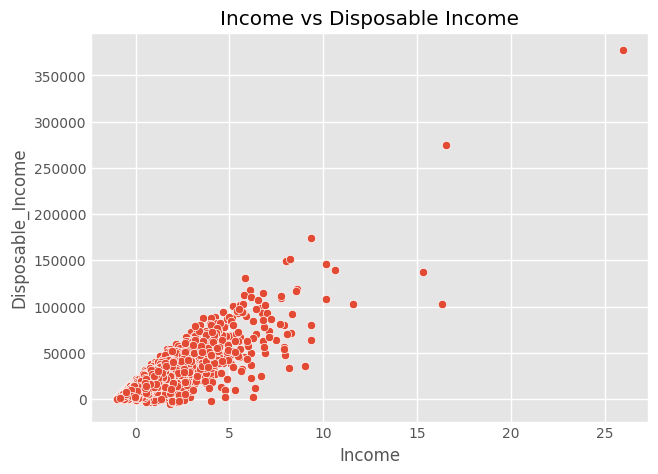

In [ ]:
# Visualize relationships between income and disposable income
sns.scatterplot(x='Income', y='Disposable_Income', data=df)
plt.title('Income vs Disposable Income')
plt.show()

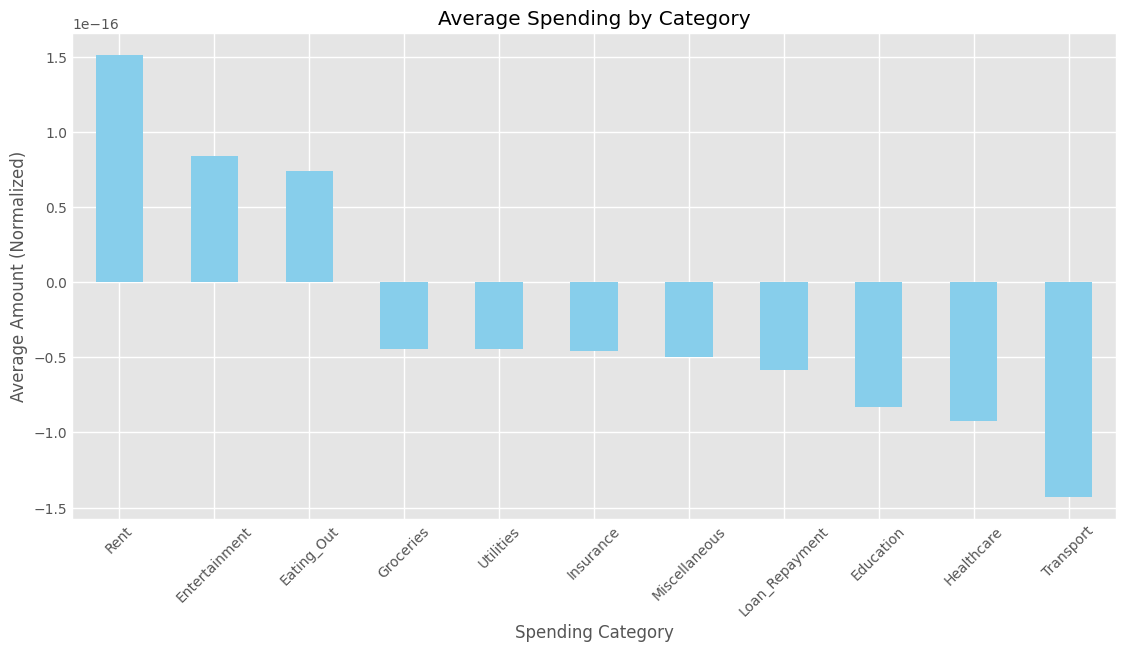

In [ ]:
# Plot 2: Spending Distribution in Different Categories
plt.figure(figsize=(12, 6))
spending_means = df[spending_columns].mean()
spending_means.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Average Spending by Category')
plt.xlabel('Spending Category')
plt.ylabel('Average Amount (Normalized)')
plt.xticks(rotation=45)
plt.show()

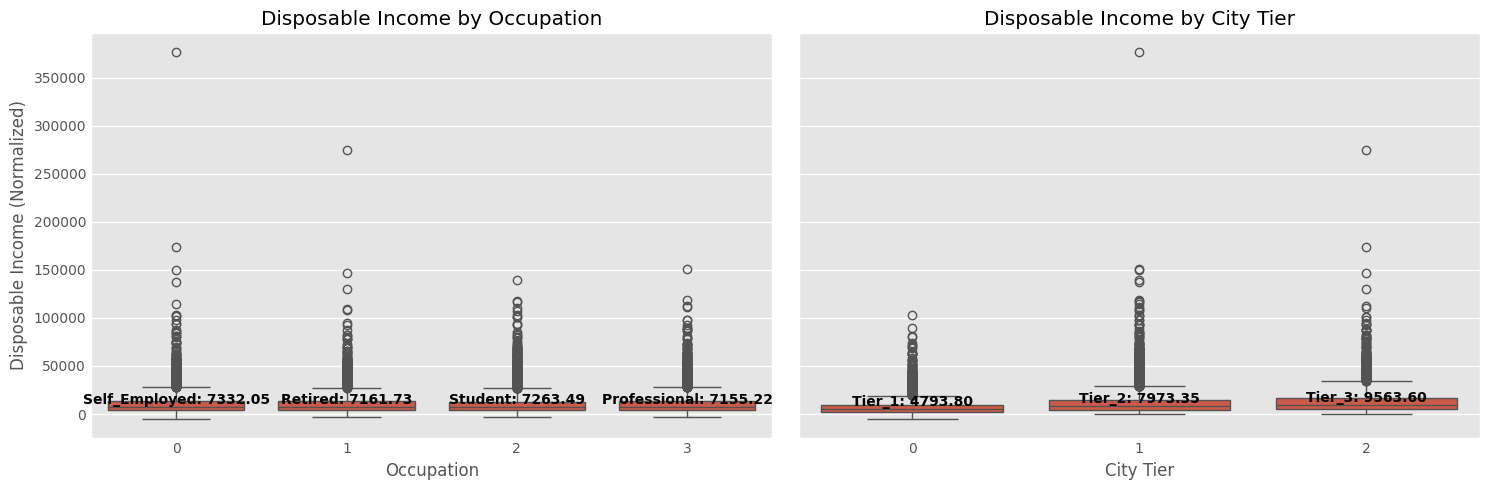

In [ ]:
# Load the original dataset without transformations to
original_data = pd.read_csv("/content/data.csv")
unique_occupations = original_data['Occupation'].unique()
unique_city_tiers = original_data['City_Tier'].unique()

# Map encoded values back to original names for better interpretability
occupation_labels = {i: name for i, name in enumerate(unique_occupations)}
city_tier_labels = {i: name for i, name in enumerate(unique_city_tiers)}
medians_occupation = df.groupby('Occupation')['Disposable_Income'].median().sort_index().values
medians_city_tier = df.groupby('City_Tier')['Disposable_Income'].median().sort_index().values


# create box plots with occupation and city tier names as labels
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

# Boxplot of Disposable Income by Occupation with occupation names annotated
sns.boxplot(x='Occupation', y='Disposable_Income', data=df, ax=axes[0])
axes[0].set_title('Disposable Income by Occupation')
axes[0].set_xlabel('Occupation')
axes[0].set_ylabel('Disposable Income (Normalized)')

# Annotate occupation names on the Occupation box plot
for i, median in enumerate(medians_occupation):
    occupation_name = occupation_labels[i]
    axes[0].text(i, median, f'{occupation_name}: {median:.2f}', ha='center', va='bottom', fontweight='bold', color='black')

# Boxplot of Disposable Income by City Tier with city names annotated
sns.boxplot(x='City_Tier', y='Disposable_Income', data=df, ax=axes[1])
axes[1].set_title('Disposable Income by City Tier')
axes[1].set_xlabel('City Tier')

# Annotate city tier names on the City Tier box plot
for i, median in enumerate(medians_city_tier):
    city_tier_name = city_tier_labels[i]
    axes[1].text(i, median, f'{city_tier_name}: {median:.2f}', ha='center', va='bottom', fontweight='bold', color='black')

plt.tight_layout()
plt.show()

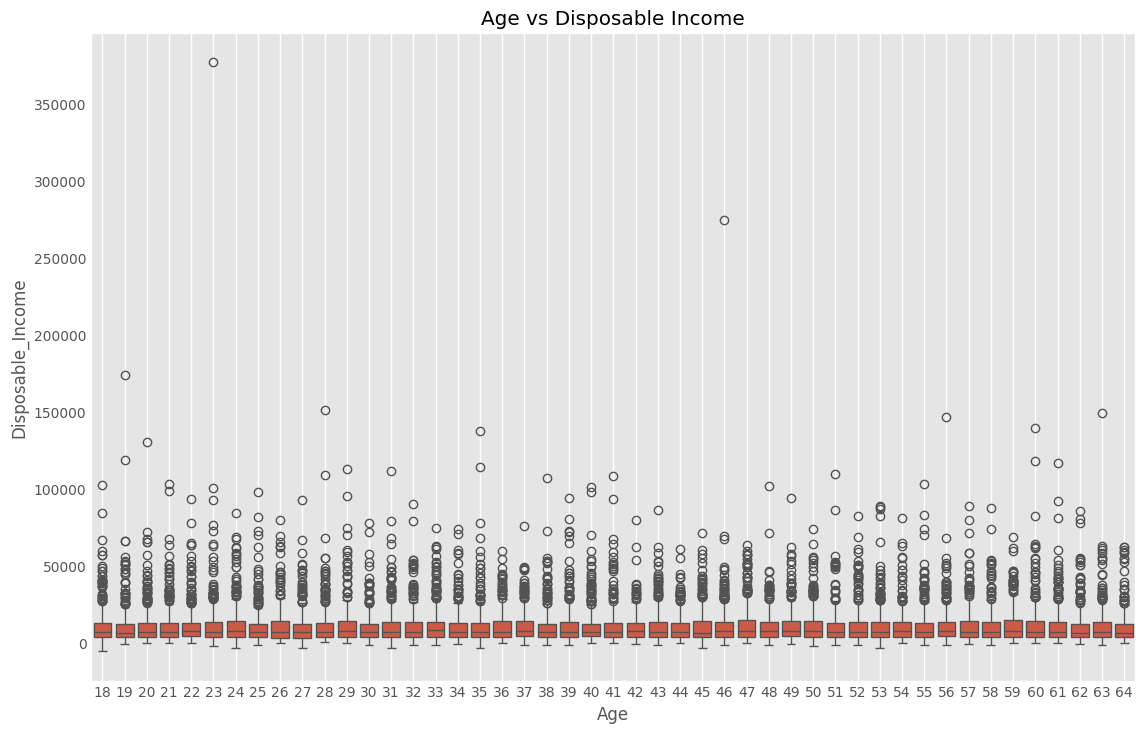

In [ ]:
# Age vs Disposable Income Analysis
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Age', y='Disposable_Income')
plt.title("Age vs Disposable Income")
plt.grid()
plt.show()



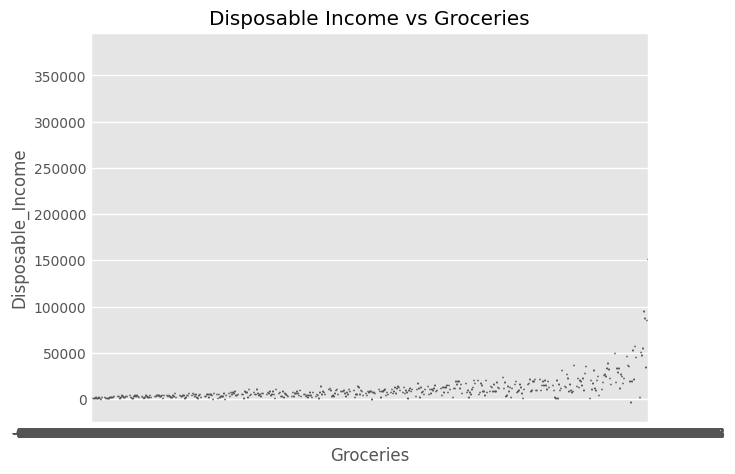

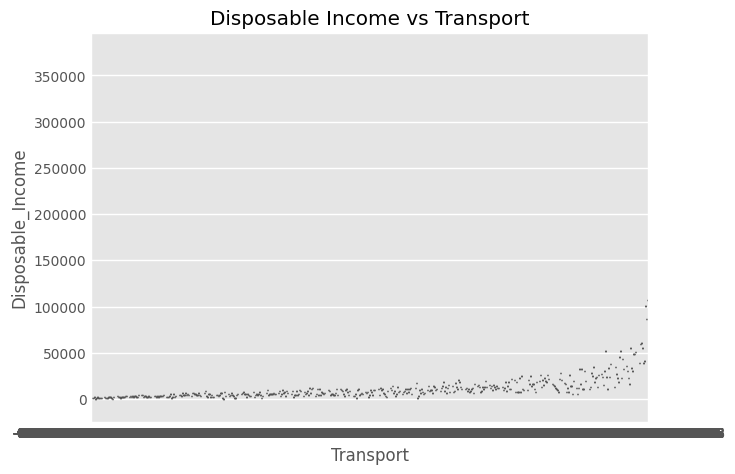

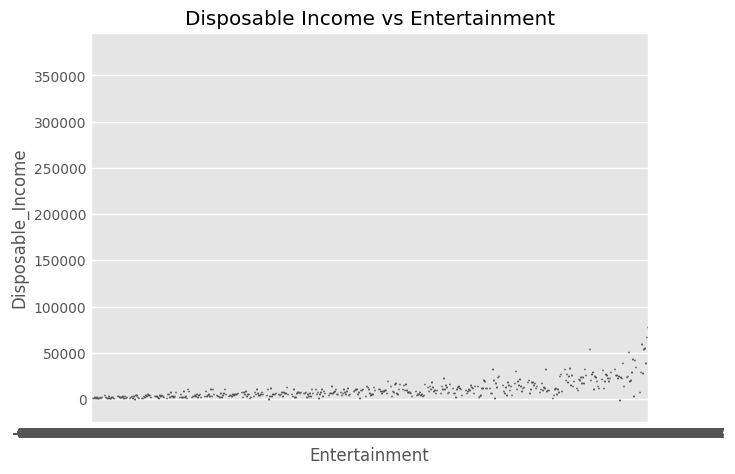

In [ ]:
# Spending trends by category
spending_categories = ['Groceries', 'Transport', 'Entertainment']
for category in spending_categories:
    sns.boxplot(x=category, y='Disposable_Income', data=df)
    plt.title(f'Disposable Income vs {category}')
    plt.show()

# 3.Feature Engineering

In [9]:
# Create new features
df['Pct_Income_Spent'] = df.apply(lambda row: row['Groceries'] / row['Income'], axis=1)
df['Dependents_to_Income_Ratio'] = df['Dependents'] / df['Income']

# Update features DataFrame
X = pd.concat([df[['Pct_Income_Spent', 'Dependents_to_Income_Ratio']]], axis=1)

# 4.Model Development

In [10]:
# Identifying potential savings columns dynamically
Potential_Savings = [col for col in df.columns if 'Savings' in col]

# Separating features and target variables
X = df.drop(columns=['Disposable_Income'] + Potential_Savings)
y = df['Disposable_Income']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes
print(f'Training features shape: {X_train.shape}, Testing features shape: {X_test.shape}')
print(f'Training income target shape: {y_train.shape}, Testing income target shape: {y_test.shape}')


Training features shape: (16000, 19), Testing features shape: (4000, 19)
Training income target shape: (16000,), Testing income target shape: (4000,)


In [ ]:
X.columns

Index(['Income', 'Age', 'Dependents', 'Occupation', 'City_Tier', 'Rent',
       'Loan_Repayment', 'Insurance', 'Groceries', 'Transport', 'Eating_Out',
       'Entertainment', 'Utilities', 'Healthcare', 'Education',
       'Miscellaneous', 'Total_spend', 'Expected', 'Pct_Income_Spent',
       'Dependents_to_Income_Ratio'],
      dtype='object')

In [ ]:
y

,Disposable_Income
0,11265.627710
1,9676.818733
2,13891.450620
3,31617.953610
4,6265.700532
...,...
19995,1163.318310
19996,30725.175170
19997,2267.905134
19998,10603.684810


In [11]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Model training: Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

# 5.Model Evaluation

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming 'model' is your trained RandomForestRegressor
X_train_prediction = model.predict(X_train)

# Evaluate using regression metrics
mse = mean_squared_error(y_train, X_train_prediction)
rmse = np.sqrt(mse)  # Root Mean Squared Error
mae = mean_absolute_error(y_train, X_train_prediction)  # Mean Absolute Error
r2 = r2_score(y_train, X_train_prediction)  # R-squared

print(f"Training Data - RMSE: {rmse}, MAE: {mae}, R²: {r2}")

Training Data - RMSE: 8.622148832219352e-06, MAE: 4.42003042763954e-06, R²: 1.0


In [24]:
# Define models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

# Evaluate models
best_model = None
best_score = float('inf')
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print(f"{model_name} - MAE: {mae}, RMSE: {rmse}")

    # Select best model based on RMSE
    if rmse < best_score:
        best_score = rmse
        best_model = model

print(f"Selected Model: {best_model}")

Linear Regression - MAE: 4.474149830735241e-06, RMSE: 1.154944722164805e-05
Random Forest - MAE: 798.2450323465492, RMSE: 3551.231806970491
Gradient Boosting - MAE: 1124.0088238454457, RMSE: 3464.4067719684667
Selected Model: LinearRegression()


Accuracy_score

In [19]:
from sklearn.metrics import accuracy_score

# Make predictions
y_pred = model.predict(X_test)

threshold = 500

y_pred_binary = np.where(np.abs(y_test - y_pred) <= threshold, 1, 0)

# Calculate accuracy
accuracy = accuracy_score(np.ones_like(y_test), y_pred_binary)
print(f'Accuracy (within ${threshold} tolerance): {accuracy:.2f}')

Accuracy (within $500 tolerance): 1.00


Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

# Evaluate model using cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation
print(f'Cross-validated accuracy scores: {cv_scores}')
print(f'Mean cross-validated accuracy: {cv_scores.mean():.2f}')

Cross-validated accuracy scores: [0.98763026 0.99975842 0.99972067 0.95315655 0.98608424]
Mean cross-validated accuracy: 0.99


In [25]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the test set
y_pred = best_model.predict(X_test)

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5  # or use mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.00
Mean Absolute Error (MAE): 0.00
R-squared (R2): 1.00


# 6. Deployment with Streamlit

In [26]:
import pickle

In [27]:
filename = "trained_model.sav"

In [28]:
from sklearn.base import is_classifier


pickle.dump(is_classifier,open(filename, 'wb'))

In [29]:
loaded_model = pickle.load(open("trained_model.sav", 'rb'))

In [37]:
input_data = (5,166,72,19,175,25.8,0.587,51,5,166,72,19,175,25.8,0.587,51,40,345,567)


# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)


# Check the shape of your input data
print("Shape of input data:", input_data_reshaped.shape)

# Check the expected number of features for your loaded model
print("Expected number of features:", loaded_model.n_features_in_)

# Make sure the number of features in input_data_reshaped matches the expected number of features


prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not saving')
else:
  print('The person is saving')

Shape of input data: (1, 19)
Expected number of features: 19
[121961.53324263]
The person is saving


# 7. Interpretation of Results and Recommendations

In [36]:
# Present insights on potential savings
# Analyze and summarize key findings, e.g., high spending areas

savings_summary = {
    'high_spending_category': 'Groceries',  # Example
    'savings_tips': 'Consider shopping at discount stores.'
}

st.write('Savings Insights:')
for key, value in savings_summary.items():
    st.write(f'{key}: {value}')

2024-11-14 13:32:10.700 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-14 13:32:10.805 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-11-14 13:32:10.807 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-14 13:32:10.810 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-14 13:32:10.812 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-14 13:32:10.815 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-14 13:32:10.816 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-14 13:32:10.818 Thread 'MainThread': mi